## Описание проекта "Мегалайн":



#### Задачи:

* Проанализировать выручку по тарифам и городам



#### Вопросы:

1. Различается ли средняя выручка по тарифам?
2. Есть ли разница межну средней выручкой по Москве и по другим городам?







## Синопсис:

1. **Анализ и очистка каждой таблицы по отдельности.**
2. **Объединяем все таблицы с таблицой, где имеются данные по интернет трафику.**
3. **Исследовательский анализ данных (Далее - ИАД) - графики распределения и статистики.**
4. **Тестирование гипотез.**
5. **Вывод.**



In [ ]:
# ипортируем все нужные библиотеки и функции
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import os
from math import trunc
import random
%matplotlib inline

In [ ]:
# для каждой таблицы находим абсолютный путь
path_calls = '/datasets/calls.csv'
path_internet = '/datasets/internet.csv'
path_messages = '/datasets/messages.csv'
path_tariffs = '/datasets/tariffs.csv'
path_users = '/datasets/users.csv'


In [ ]:
# читаем каждую таблицу через try-except
try:
    df_calls = pd.read_csv(path_calls,index_col=0)
    df_internet = pd.read_csv(path_internet)
    df_messages = pd.read_csv(path_messages,index_col=0)
    df_tariffs = pd.read_csv(path_tariffs,index_col=0)
    df_users = pd.read_csv(path_users,index_col=0)
except Exception as ex:
    print(f'Что-то не так: {ex}')

In [ ]:
df_calls = pd.read_csv('/datasets/calls.csv',index_col=0)
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv',index_col=0)
df_tariffs = pd.read_csv('/datasets/tariffs.csv',index_col=0)
df_users = pd.read_csv('/datasets/users.csv',index_col=0)

In [ ]:
# создаем список переменных,
# ссылающихся на объект ввиде соответствующих таблиц
# для дальнейшего анализа
lst = [df_calls,df_internet,df_messages,df_tariffs,df_users]

In [ ]:
# создаем список идентичного размера с lst
# для присваение аналогичного названия через цикл и .name
names_lst = ['df_calls','df_internet','df_messages','df_tariffs','df_users']

In [ ]:
# создаем функцию для присовения имени таблицы
def name_data(data):
    for i in range(len(lst)):
        lst[i].name = names_lst[i]

In [ ]:
# применяем функцию
name_data(lst)

In [ ]:
# функция для проверки имени таблиц
def check_name(data):
    print(data.name)

In [ ]:
# применяем функцию проверки при помощи list-map связки
list(map(check_name,lst)) ;


df_calls
df_internet
df_messages
df_tariffs
df_users


In [ ]:
# функция для первого взгляда и анализа всего нужного
# в таблице
def check_data(data, hd = 5, inf=True,clmns=True,shp=True,na=True,dplc=True):
    if hd:
        print(f'First {hd} row(s) from {data.name}:')
        display(data.head())
        print('-'*20)
    if inf:
        print(f'{data.name} information:')
        print(f'')
        print(data.info())
        print('-'*20)
    if clmns:
        print(f'{data.name} columns:')
        print(data.columns)
        print('-'*20)
    if shp:
        print(f'{data.name} shape:')
        print(data.shape)
        print('-'*20)
    if na:
        print(f'{data.name} isna by column mean:')
        print(data.isna().sum())
        print('-'*20)
    if dplc:
        print(f'{data.name} clear duplicates sum')
        print(data.duplicated().sum())
        print('-'*20)
    print('-'*100)

In [ ]:
# применяем функцию для анализа таблицы

list(map(check_data,lst))

First 5 row(s) from df_calls:


,call_date,duration,user_id
id,,,
1000_0,2018-07-25,0.00,1000
1000_1,2018-08-17,0.00,1000
1000_2,2018-06-11,2.85,1000
1000_3,2018-09-21,13.80,1000
1000_4,2018-12-15,5.18,1000


--------------------
df_calls information:

<class 'pandas.core.frame.DataFrame'>
Index: 202607 entries, 1000_0 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   call_date  202607 non-null  object 
 1   duration   202607 non-null  float64
 2   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None
--------------------
df_calls columns:
Index(['call_date', 'duration', 'user_id'], dtype='object')
--------------------
df_calls shape:
(202607, 3)
--------------------
df_calls isna by column mean:
call_date    0
duration     0
user_id      0
dtype: int64
--------------------
df_calls clear duplicates sum
8838
--------------------
----------------------------------------------------------------------------------------------------
First 5 row(s) from df_internet:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


--------------------
df_internet information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
--------------------
df_internet columns:
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
--------------------
df_internet shape:
(149396, 5)
--------------------
df_internet isna by column mean:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
--------------------
df_internet clear duplicates sum
0
--------------------
----------------------------------------------------------

,message_date,user_id
id,,
1000_0,2018-06-27,1000
1000_1,2018-10-08,1000
1000_2,2018-08-04,1000
1000_3,2018-06-16,1000
1000_4,2018-12-05,1000


--------------------
df_messages information:

<class 'pandas.core.frame.DataFrame'>
Index: 123036 entries, 1000_0 to 1499_183
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   message_date  123036 non-null  object
 1   user_id       123036 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB
None
--------------------
df_messages columns:
Index(['message_date', 'user_id'], dtype='object')
--------------------
df_messages shape:
(123036, 2)
--------------------
df_messages isna by column mean:
message_date    0
user_id         0
dtype: int64
--------------------
df_messages clear duplicates sum
70379
--------------------
----------------------------------------------------------------------------------------------------
First 5 row(s) from df_tariffs:


,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
messages_included,,,,,,,
50,15360,500,550,200,3,3,smart
1000,30720,3000,1950,150,1,1,ultra


--------------------
df_tariffs information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 50 to 1000
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   mb_per_month_included  2 non-null      int64 
 1   minutes_included       2 non-null      int64 
 2   rub_monthly_fee        2 non-null      int64 
 3   rub_per_gb             2 non-null      int64 
 4   rub_per_message        2 non-null      int64 
 5   rub_per_minute         2 non-null      int64 
 6   tariff_name            2 non-null      object
dtypes: int64(6), object(1)
memory usage: 128.0+ bytes
None
--------------------
df_tariffs columns:
Index(['mb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff_name'],
      dtype='object')
--------------------
df_tariffs shape:
(2, 7)
--------------------
df_tariffs isna by column mean:
mb_per_month_included   

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


--------------------
df_users information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         500 non-null    int64 
 1   churn_date  38 non-null     object
 2   city        500 non-null    object
 3   first_name  500 non-null    object
 4   last_name   500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
dtypes: int64(1), object(6)
memory usage: 31.2+ KB
None
--------------------
df_users columns:
Index(['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff'],
      dtype='object')
--------------------
df_users shape:
(500, 7)
--------------------
df_users isna by column mean:
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
--------------------
df_users clear duplic

[None, None, None, None, None]

In [ ]:
# функция для провеки на аномалии и артефакты
def check_anomal(data):
    lst = data.columns
    print(f'Данные для {data.name}:')
    for i in lst:
        display(data[i].value_counts()
                .reset_index()
                .sort_values('index')
                )
    print('-'*100)

In [ ]:
# проверка на аномалии
list(map(check_anomal,lst)) ;

Данные для df_calls:


,index,call_date
364,2018-01-01,5
362,2018-01-02,9
363,2018-01-03,7
358,2018-01-04,23
360,2018-01-05,20
...,...,...
12,2018-12-27,1110
13,2018-12-28,1106
1,2018-12-29,1202
2,2018-12-30,1192


,index,duration
0,0.00,39613
678,0.01,101
1073,0.02,84
1142,0.03,80
1058,0.04,85
...,...,...
2787,35.95,1
2761,36.12,1
2754,36.47,1
2786,37.35,1


,index,user_id
232,1000,368
418,1001,122
339,1002,217
151,1003,520
373,1004,176
...,...,...
133,1495,565
46,1496,828
354,1497,201
371,1498,180


----------------------------------------------------------------------------------------------------
Данные для df_internet:


,index,Unnamed: 0
0,0,1
99208,1,1
101930,2,1
100764,3,1
94930,4,1
...,...,...
21763,149391,1
15925,149392,1
14759,149393,1
18261,149394,1


,index,id
46335,1000_0,1
114380,1000_1,1
123129,1000_10,1
148547,1000_100,1
5796,1000_101,1
...,...,...
88960,1499_95,1
59,1499_96,1
68525,1499_97,1
139146,1499_98,1


,index,mb_used
0,0.00,19598
38084,0.03,1
66328,0.04,1
49467,0.06,1
18788,0.07,2
...,...,...
51489,1623.92,1
40396,1651.25,1
64167,1651.55,1
52571,1702.75,1


,index,session_date
363,2018-01-01,3
364,2018-01-02,3
362,2018-01-03,6
361,2018-01-04,9
360,2018-01-05,14
...,...,...
12,2018-12-27,803
13,2018-12-28,802
6,2018-12-29,825
1,2018-12-30,903


,index,user_id
309,1000,211
428,1001,96
171,1002,369
418,1003,104
226,1004,300
...,...,...
270,1495,254
0,1496,834
397,1497,121
291,1498,232


----------------------------------------------------------------------------------------------------
Данные для df_messages:


,index,message_date
361,2018-01-02,10
363,2018-01-03,4
362,2018-01-04,10
360,2018-01-05,10
356,2018-01-06,15
...,...,...
24,2018-12-27,644
5,2018-12-28,699
3,2018-12-29,702
1,2018-12-30,765


,index,user_id
80,1000,496
338,1002,70
121,1003,380
5,1004,1192
61,1005,552
...,...,...
137,1495,340
87,1496,468
362,1497,51
240,1498,168


----------------------------------------------------------------------------------------------------
Данные для df_tariffs:


,index,mb_per_month_included
0,15360,1
1,30720,1


,index,minutes_included
0,500,1
1,3000,1


,index,rub_monthly_fee
1,550,1
0,1950,1


,index,rub_per_gb
1,150,1
0,200,1


,index,rub_per_message
0,1,1
1,3,1


,index,rub_per_minute
0,1,1
1,3,1


,index,tariff_name
0,smart,1
1,ultra,1


----------------------------------------------------------------------------------------------------
Данные для df_users:


,index,age
46,18,6
28,19,9
23,20,9
5,21,12
54,22,5
32,23,9
29,24,9
38,25,7
12,26,11
31,27,9


,index,churn_date
17,2018-08-17,1
12,2018-08-31,1
14,2018-09-02,1
21,2018-09-26,1
6,2018-09-27,1
0,2018-10-03,2
9,2018-10-04,1
29,2018-10-05,1
3,2018-10-14,2
26,2018-10-25,1


,index,city
71,Архангельск,1
38,Астрахань,4
27,Балашиха,5
54,Барнаул,3
60,Белгород,2
...,...,...
11,Челябинск,9
52,Череповец,3
34,Чита,4
50,Якутск,3


,index,first_name
47,Авксентий,3
157,Агата,1
122,Агафья,2
136,Агнесса,2
18,Адам,4
...,...,...
131,Юлия,2
66,Юна,3
225,Юрий,1
85,Яков,2


,index,last_name
380,Ёлчина,1
216,Ёркин,1
170,Ёркина,1
24,Ёрохов,2
167,Ёрохова,1
...,...,...
333,Швецов,1
89,Шевцов,1
395,Шевцова,1
139,Щербакова,1


,index,reg_date
100,2018-01-01,2
105,2018-01-02,2
3,2018-01-04,5
183,2018-01-05,1
191,2018-01-06,1
...,...,...
103,2018-12-23,2
178,2018-12-25,1
137,2018-12-29,2
248,2018-12-30,1


,index,tariff
0,smart,351
1,ultra,149


----------------------------------------------------------------------------------------------------


## План действий


### df_calls:
***********
#### Название столбцов:
* С названиями столбцов все впорядке, их нужно оставить так.
#### Типы данных:
1. Колонку `call_date` перевести к типу `datetime`. Также выделим день в дате звонка для дальнейшего анализа.
2. Поскольку все данные по звонкам компания округляет до минуты, стоит воспользоваться функцией `ceil()` из модуля `numpy`, округлив тем самым до большего числа все звонки в том числе и очень короткие. После этого, переведем к типу `int`

#### Пропущенные значения:

* Пропущенные значения отсутствуют.

#### Дубликаты:

* Явные дубликаты есть: **8838 шт.**. Это количество пропущенных вызовов в какие-то одинаковые дни.

#### Артефакты, аномалии и неявные дубликаты:

* На данном этапе, артефакты, аномалии и неявные дубликаты не выявлены.

#### Иные действия:

* Явные дубликаты можно и даже нужно удалить при анализе средней выручке. Для анализа, например, пропущенных вызовов - очень даже пригодится.
***********
### df_internet:
***********
#### Название столбцов:

* Удалить столбец `Unnamed: 0`.
* Сделать столбец `id` индексом.

#### Типы данных:

* Привести столбец `session_date` к типу `datetime`.

#### Пропущенные значения:

* Пропущенные значения отсутствуют.

#### Дубликаты:

* Дубликаты отсутствуют.

#### Артефакты, аномалии и неявные дубликаты:

* Сессия с `0` в значении потраченного трафика (столбец `mb_used`) - удалить, потому что никакой смысловой и коммерческой нагрузки это не несет: за 0 ГБ клиент не переплачивает в случае выхода за верхнюю границу по тарифу, лишь влияет на статистики, искажая картину для нужных нам целей. Для исследовательского анализа данных можно оставить их и посчитать интересные значения:
     * Долю каждого пользователя со значением `0`
     * Общее количество со значением `0`
      И т.п.
***********
### df_messages:
***********
#### Название столбцов:

* С названиями столбцов все впорядке.

#### Типы данных:

* В столбце `message_date` поменять тип данных на `datetime`.

#### Пропущенные значения:

* Пропущенные значения отсутствуют.

#### Дубликаты:

* Дубликаты присутствуют - **70379 шт.** **Удалять их нельзя!** Потому что в пакетах есть определенных максимум количества смс, после которого начинается взыматься плата согласно подключенному тарифу.

#### Артефакты, аномалии и неявные дубликаты:

* На данном этапе, артефакты, аномалии и неявные дубликаты не выявлены.

***********
### df_tariffs:

***********
#### Название столбцов:

* С названиями столбцов все хорошо.

#### Типы данных:

* Типы данные изменять не нужно.

#### Пропущенные значения:

* Пропущенных значений нет.

#### Дубликаты:

* Дубликатов нет.

#### Артефакты, аномалии и неявные дубликаты:

* На данном этапе, артефакты, аномалии и неявные дубликаты не выявлены.

#### Иные действия
* `reset_index()` для того чтобы убрать `messages_included` из индекса
* В столбце `mb_per_month_included` округлить до **15_000** и **30_000** Мегабайтов в соответствии тарифам. Для того, чтобы было удобнее читать дополнительные Гигабайты
***********


### df_users
***********
#### Название столбцов:


Все впорядке


#### Типы данных:

* `churn_date` и `reg_date` переведем в тип данных `datetime`




#### Пропущенные значения:

* `churn_date`  есть но они показывают то, что тариф не переключали он остался неизменным с регистрации. Их можно не заполнять.


#### Дубликаты:

* Дубликаты отсутствуют.

#### Артефакты, аномалии и неявные дубликаты:

* На данном этапе, артефакты, аномалии и неявные дубликаты не выявлены. Однако в целях минимизации рисков встречи в дальнейшем с неявными дубликатами, связанных с `ё` и `е` и регистрами,преобразуем значения столбцов:

1. `first_name`
2. `last_name`
3. `city_name`

Таким образом:

1. Приведем все к нижнему регистру.
2. Заменим букву `ё` на `е`.
#### Иные действия

* `reset_index()` для того чтобы убрать `users_id` из индекса
***********

## Очистка данных

### Очистика df_calls

In [ ]:
# для проверки
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202607 entries, 1000_0 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   call_date  202607 non-null  object 
 1   duration   202607 non-null  float64
 2   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
# функция для перевода тип данных object в datetime
def to_date(data,column,infer_datetime_format='%Y-%M-%d'):
    data[column] = pd.to_datetime(data[column],infer_datetime_format=infer_datetime_format)

In [ ]:
# переводим в datetime
to_date(df_calls,'call_date')

In [ ]:
# проверка
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202607 entries, 1000_0 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  202607 non-null  datetime64[ns]
 1   duration   202607 non-null  float64       
 2   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 6.2+ MB


In [ ]:
# функция для избаление записей с нулями
# вместе с проверкой
def drop_zero(data,column):
    old_calls = data.shape[0]
    count_zero_dur = data[data[column] == 0][column].count()
    data.drop(data[data[column] == 0].index,inplace=True)
    print(f"""Сколько осталось после очистики строк с 0? => {data[data[column] == 0]
                            [column]
                            .count()}""")
    new_calls = data.shape[0]
    print(f'Убрали верное количество? => {old_calls - new_calls == count_zero_dur}')


**Объяснение:**

Мы можем так сделать потому, что нам значения `0` лишь будут портить значения статистик и распределение. Никакого коммерческого смысла в этих записях нет, потому что нам важен выход за рамки тарифа.

In [ ]:
# убираем нули в таблице df_calls в столбце duration
drop_zero(df_calls,'duration')

Сколько осталось после очистики строк с 0? => 0
Убрали верное количество? => True


In [ ]:
#  проверка
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162994 entries, 1000_2 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  162994 non-null  datetime64[ns]
 1   duration   162994 non-null  float64       
 2   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.0+ MB


In [ ]:
# для проверки
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162994 entries, 1000_2 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  162994 non-null  datetime64[ns]
 1   duration   162994 non-null  float64       
 2   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.0+ MB


In [ ]:
# округляем до большего целого
df_calls['duration'] = np.ceil(df_calls['duration'])

In [ ]:
# приводим к типу int
df_calls['duration'] = df_calls['duration'].astype('int64',errors='raise')

In [ ]:
# проверка
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162994 entries, 1000_2 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  162994 non-null  datetime64[ns]
 1   duration   162994 non-null  int64         
 2   user_id    162994 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.0+ MB


### Очистка df_internet

In [ ]:
df_internet.head(2)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000


In [ ]:
# убираем ненужный столбец
df_internet.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# присваиваем в таблице новой индекс id
df_internet.set_index('id',inplace=True)

In [ ]:
# проверка
df_internet.head()

,mb_used,session_date,user_id
id,,,
1000_0,112.95,2018-11-25,1000
1000_1,1052.81,2018-09-07,1000
1000_2,1197.26,2018-06-25,1000
1000_3,550.27,2018-08-22,1000
1000_4,302.56,2018-09-24,1000


In [ ]:
# меняем тип данных на временной
to_date(df_internet,'session_date')

In [ ]:
# проверка
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149396 entries, 1000_0 to 1499_156
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mb_used       149396 non-null  float64       
 1   session_date  149396 non-null  datetime64[ns]
 2   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6+ MB


In [ ]:
# убриаем нули в столбце mb_used
drop_zero(df_internet,'mb_used')

Сколько осталось после очистики строк с 0? => 0
Убрали верное количество? => True


In [ ]:
# проверка
df_internet.shape[0]

129798

### Очистка df_messages


In [ ]:
#  для проверки
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123036 entries, 1000_0 to 1499_183
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   message_date  123036 non-null  object
 1   user_id       123036 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
# приводим к временному типу message_date
to_date(df_messages,'message_date')

In [ ]:
# проверка
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123036 entries, 1000_0 to 1499_183
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_date  123036 non-null  datetime64[ns]
 1   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8+ MB


### Очистка df_tariffs

In [ ]:
# для проверки
df_tariffs.head(2)

,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
messages_included,,,,,,,
50,15360,500,550,200,3,3,smart
1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# обновляем индекс, индекс старый идет в таблицу
df_tariffs.reset_index(inplace=True)

In [ ]:
# проверка
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# функция для выделения тысячных
def round_to_thousand(data,column):
    data[column] = data[column] / 1_024


In [ ]:
df_tariffs['mb_per_month_included']

0    15360
1    30720
Name: mb_per_month_included, dtype: int64

In [ ]:
# применяем функцию
round_to_thousand(df_tariffs,'mb_per_month_included')

In [ ]:
# умножаем на 1_000 каждое значение, чтобы окончательно
# перевести в тысячи Мб
df_tariffs['mb_per_month_included'] = (df_tariffs['mb_per_month_included']
                                        .apply(lambda x: int(str(x)[:str(x).find('.')])*1024)
                                      )

In [ ]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
# проверка
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
# проверка
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Очистка df_users

In [ ]:
# #  для проверки
df_users.head(2)

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [ ]:
# обновляем индекс, старый идет в таблицу
df_users.reset_index(inplace=True)


In [ ]:
# #  для проверки
df_users.head(1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [ ]:
# список со столбцами с датами через list comprehension
users_date_lst = [i for i in df_users.columns if 'date' in i]

In [ ]:
users_date_lst

['churn_date', 'reg_date']

In [ ]:
# список для уменьшения регистра, обрезнаеья и
# удлаенья буквы е с точками
users_low_ye_lst = [i for i in df_users.columns if (('name' in i) or ('city' in i))]

In [ ]:
users_low_ye_lst

['city', 'first_name', 'last_name']

In [ ]:
# прмиеняем функцию измененья типа на временной
to_date(df_users,'reg_date')
to_date(df_users,'churn_date')

In [ ]:
# проверка
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [ ]:
# функция для уменьшения регистра
def low_reg(column):
    df_users[column] = df_users[column].str.lower()

In [ ]:
# применяем
list(map(low_reg,users_low_ye_lst))

[None, None, None]

In [ ]:
# создаем словарь для "перевода"
trns_dct = str.maketrans({"ё":"е"})
trns_dct

{1105: 'е'}

In [ ]:
# функция, осуществляющая перевод
def ye_replacer(data):
    return data.translate(trns_dct)


In [ ]:
#  для проверки
df_users[df_users['first_name'] == "алёна"]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
462,1462,72,NaT,тольятти,алёна,абрамычева,2018-10-29,smart


In [ ]:
# применяем функцию через apply и
# заменчем е с точками на е без точек
df_users['first_name'] = df_users['first_name'].apply(ye_replacer)

In [ ]:
# проверка
df_users[df_users['first_name'] == "алёна"]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


In [ ]:
# приводим к дате
to_date(df_users,'churn_date')

In [ ]:
# проверка
df_users['churn_date'].sort_values()

254   2018-08-17
71    2018-08-31
255   2018-09-02
480   2018-09-26
392   2018-09-27
         ...    
494          NaT
495          NaT
496          NaT
497          NaT
499          NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

In [ ]:
# создаем копию списка lst
data_lst = lst[:]

In [ ]:
# проверка- действительно ли копия
print(id(lst) != id(data_lst))

True


In [ ]:
# убираем 3 элемент из списка
data_lst.pop(3)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Создание основной, финальной таблицы final_data.

In [ ]:
# На случай-другой "плавим" таблицу.
melted_tarifff = pd.melt(df_tariffs,id_vars=['tariff_name']).sort_values(by='tariff_name')

In [ ]:
# рассмотрим полученную таблицу
melted_tarifff.head(2)

,tariff_name,variable,value
0,smart,messages_included,50
2,smart,mb_per_month_included,15360


In [ ]:

df_users.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,NaT,москва,иван,ежов,2018-11-01,smart


In [ ]:
# проверяем через цикл, где и сколько
# уникальных клиентов
for i in data_lst:
    display(i.head(2))
    print(i['user_id'].nunique())

,call_date,duration,user_id
id,,,
1000_2,2018-06-11,3,1000
1000_3,2018-09-21,14,1000


492


,mb_used,session_date,user_id
id,,,
1000_0,112.95,2018-11-25,1000
1000_1,1052.81,2018-09-07,1000


497


,message_date,user_id
id,,
1000_0,2018-06-27,1000
1000_1,2018-10-08,1000


426


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,NaT,москва,иван,ежов,2018-11-01,smart


500


In [ ]:
# создаем столбцы с месяца=ем регистрации
# месяцем расторжения договора
df_users['reg_month'] = df_users['reg_date'].dt.month
df_users['churn_month'] = df_users['churn_date'].dt.month

In [ ]:
# выделяем месяц регистрации и
# создаем соответствующий столбец
df_users['registration_month'] = df_users['reg_date'].dt.month

In [ ]:
# выделяем месяц действия в интернете
df_internet['reg_month'] = df_internet['session_date'].dt.month


In [ ]:
df_internet['reg_month_1'] = str(df_internet['session_date'].dt.month)

In [ ]:
# создаем временную табилцу tmp_internet для группировки по месяцам
# группируя по user_id и reg_month
tmp_internet  =  df_internet.groupby(['user_id','reg_month']).agg({'mb_used':'sum'}).reset_index()

In [ ]:
# смотрим на новоиспеченную таблицу
tmp_internet.head()

,user_id,reg_month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [ ]:
# для удобства
df_users.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,registration_month
0,1000,52,NaT,краснодар,рафаил,верещагин,2018-05-25,ultra,5,NaN,5
1,1001,41,NaT,москва,иван,ежов,2018-11-01,smart,11,NaN,11


In [ ]:
# соединяем срез таблицы df_users
# и tmp_internet по user_id и reg_month
tmp = pd.merge(df_users.loc[:,['user_id','reg_month']],
               tmp_internet,
               how='outer',
               on=['user_id','reg_month'])

In [ ]:
# Смотрим на результат
tmp.head(2)

,user_id,reg_month,mb_used
0,1000,5,2253.49
1,1001,11,18429.34


In [ ]:
# в таблицы df_calls создаем столбец
# с месяцем звонка
df_calls['reg_month'] = df_calls['call_date'].dt.month

In [ ]:
# создаем временную таблицу для группировки по месяцам
tmp_calls = df_calls.groupby(['user_id','reg_month'])['duration'].sum().reset_index()

In [ ]:
# результат
tmp_calls.head(2)

,user_id,reg_month,duration
0,1000,5,159
1,1000,6,172


In [ ]:
# соединяем  таблицу tmp
# и tmp_calls по user_id и reg_month
tmp = tmp.merge(tmp_calls, how='outer',
               on=['user_id','reg_month'])

In [ ]:
# результат
tmp

,user_id,reg_month,mb_used,duration
0,1000,5,2253.49,159.0
1,1001,11,18429.34,430.0
2,1002,6,10856.82,117.0
3,1003,8,8565.21,380.0
4,1004,5,13403.98,35.0
...,...,...,...,...
3211,1273,8,NaN,253.0
3212,1273,9,NaN,223.0
3213,1273,10,NaN,315.0
3214,1273,11,NaN,272.0


In [ ]:
# в таблицы df_messages создаем столбец
# с месяцем сообщения
df_messages['reg_month'] = df_messages['message_date'].dt.month

In [ ]:
# создаем временную таблицу для группировки по месяцам
tmp_messages = df_messages.groupby(['user_id','reg_month']).agg('count').reset_index()
tmp_messages

,user_id,reg_month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [ ]:
# даем имена колонкам в tmp_messages
tmp_messages.columns= ['user_id','reg_month','message_total']

In [ ]:
# проверка
tmp_messages

,user_id,reg_month,message_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [ ]:
# соединяем  таблицу tmp
# и tmp_messages по user_id и reg_month
tmp = tmp.merge(tmp_messages, how='outer',
               on=['user_id','reg_month'])

In [ ]:
# check
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3216 non-null   int64  
 1   reg_month      3216 non-null   int64  
 2   mb_used        3201 non-null   float64
 3   duration       3168 non-null   float64
 4   message_total  2717 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 150.8 KB


In [ ]:
# check
tmp[tmp['user_id'] == 1000]

,user_id,reg_month,mb_used,duration,message_total
0,1000,5,2253.49,159.0,22.0
500,1000,6,23233.77,172.0,60.0
501,1000,7,14003.64,340.0,75.0
502,1000,8,14055.93,408.0,81.0
503,1000,9,14568.91,466.0,57.0
504,1000,10,14702.49,350.0,73.0
505,1000,11,14756.47,338.0,58.0
506,1000,12,9817.61,333.0,70.0


In [ ]:
# соединяем срез таблицы df_users
# и tmp по user_id и получаем итоговую таблицу
final_data = tmp.merge(df_users.loc[:,['user_id','registration_month','churn_month','city','tariff']],
               how='outer',
               on='user_id')

In [ ]:
final_data

,user_id,reg_month,mb_used,duration,message_total,registration_month,churn_month,city,tariff
0,1000,5,2253.49,159.0,22.0,5,NaN,краснодар,ultra
1,1000,6,23233.77,172.0,60.0,5,NaN,краснодар,ultra
2,1000,7,14003.64,340.0,75.0,5,NaN,краснодар,ultra
3,1000,8,14055.93,408.0,81.0,5,NaN,краснодар,ultra
4,1000,9,14568.91,466.0,57.0,5,NaN,краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3211,1498,10,20579.36,247.0,42.0,7,10.0,владикавказ,smart
3212,1499,9,1845.75,70.0,11.0,9,NaN,пермь,smart
3213,1499,10,17788.51,449.0,48.0,9,NaN,пермь,smart
3214,1499,11,17963.31,612.0,59.0,9,NaN,пермь,smart


In [ ]:
# смотрим на результат
final_data.head(2)

,user_id,reg_month,mb_used,duration,message_total,registration_month,churn_month,city,tariff
0,1000,5,2253.49,159.0,22.0,5,NaN,краснодар,ultra
1,1000,6,23233.77,172.0,60.0,5,NaN,краснодар,ultra


In [ ]:
# функция для округления "по потолку" по тысячам
# def round_to_big(data):
#     return ((trunc(data/1_000) + 1) * 1_000)


In [ ]:
# check
# функция для округления "по потолку" по тысячам
def round_to_big(data):
    return ((trunc(data/1_024) + 1) * 1_024)


In [ ]:
# check
round_to_big(0), np.ceil(0)

(1024, 0.0)

In [ ]:
final_data['mb_used']

0        2253.49
1       23233.77
2       14003.64
3       14055.93
4       14568.91
          ...   
3211    20579.36
3212     1845.75
3213    17788.51
3214    17963.31
3215    13055.58
Name: mb_used, Length: 3216, dtype: float64

In [ ]:
# для проверки
final_data[final_data['mb_used'] == -1_000]

,user_id,reg_month,mb_used,duration,message_total,registration_month,churn_month,city,tariff


In [ ]:
# заполняем NAN в mb_used для того, чтобы после функции
# round_to_big эти значения заполнились нулями
final_data['mb_used'] =final_data['mb_used'].fillna(value=(-1000))

In [ ]:
# проверка
final_data[final_data['mb_used'] == -1_000]

,user_id,reg_month,mb_used,duration,message_total,registration_month,churn_month,city,tariff
592,1094,5,-1000.0,107.0,3.0,5,NaN,новосибирск,ultra
827,1128,12,-1000.0,NaN,NaN,12,12.0,волжский,ultra
1723,1273,5,-1000.0,220.0,21.0,5,NaN,курган,ultra
1724,1273,6,-1000.0,230.0,38.0,5,NaN,курган,ultra
1725,1273,7,-1000.0,253.0,37.0,5,NaN,курган,ultra
1726,1273,8,-1000.0,253.0,41.0,5,NaN,курган,ultra
1727,1273,9,-1000.0,223.0,32.0,5,NaN,курган,ultra
1728,1273,10,-1000.0,315.0,35.0,5,NaN,курган,ultra
1729,1273,11,-1000.0,272.0,29.0,5,NaN,курган,ultra
1730,1273,12,-1000.0,260.0,39.0,5,NaN,курган,ultra


In [ ]:
# Заполнение пропусков
final_data['message_total'].fillna(value=0,inplace=True)
final_data['duration'].fillna(value=0,inplace=True)

In [ ]:
# Проверка
final_data.isna().mean()

user_id               0.000000
reg_month             0.000000
mb_used               0.000000
duration              0.000000
message_total         0.000000
registration_month    0.000000
churn_month           0.941231
city                  0.000000
tariff                0.000000
dtype: float64

In [ ]:
# Проверка
final_data.isna().mean()

user_id               0.000000
reg_month             0.000000
mb_used               0.000000
duration              0.000000
message_total         0.000000
registration_month    0.000000
churn_month           0.941231
city                  0.000000
tariff                0.000000
dtype: float64

In [ ]:
# проверка
final_data['mb_used'].isna().mean()

0.0

In [ ]:
# для проверки
len(final_data[final_data['mb_used'] == -1000])

15

In [ ]:
# применяем функцию уже к чистым данным
final_data['mb_used'] = final_data['mb_used'].apply(round_to_big)

In [ ]:
# проверка
len(final_data[final_data['mb_used'] == 0])

0

In [ ]:
# делим на тысячу для выделения ГБ
final_data['mb_used'] = final_data['mb_used'] / 1_024

In [ ]:
# переименование
final_data.rename(columns={'mb_used':'gb_used_monthly',
                           'message_total':'message_monthly',
                           'duration':'call_dur_monthly',
                          'tariff':'tariff_name'},
                  inplace=True)

In [ ]:
final_data.columns

Index(['user_id', 'reg_month', 'gb_used_monthly', 'call_dur_monthly',
       'message_monthly', 'registration_month', 'churn_month', 'city',
       'tariff_name'],
      dtype='object')

In [ ]:
# для проверки
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3216 non-null   int64  
 1   reg_month           3216 non-null   int64  
 2   gb_used_monthly     3216 non-null   float64
 3   call_dur_monthly    3216 non-null   float64
 4   message_monthly     3216 non-null   float64
 5   registration_month  3216 non-null   int64  
 6   churn_month         189 non-null    float64
 7   city                3216 non-null   object 
 8   tariff_name         3216 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 251.2+ KB


In [ ]:
# функция, переводящая в тип int
def to_int_column(column):
    final_data[column] = final_data[column].astype('int64',errors='raise')

In [ ]:
# список названий столбцов
# которые переведем в int
lst_to_int = [i for i in final_data.columns if 'monthly' in i]

In [ ]:
lst_to_int

['gb_used_monthly', 'call_dur_monthly', 'message_monthly']

In [ ]:
# применяем функцию
list(map(to_int_column,lst_to_int))

[None, None, None]

In [ ]:
# проверка
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3216 non-null   int64  
 1   reg_month           3216 non-null   int64  
 2   gb_used_monthly     3216 non-null   int64  
 3   call_dur_monthly    3216 non-null   int64  
 4   message_monthly     3216 non-null   int64  
 5   registration_month  3216 non-null   int64  
 6   churn_month         189 non-null    float64
 7   city                3216 non-null   object 
 8   tariff_name         3216 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 251.2+ KB


In [ ]:
# для удобвства
df_tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Добавление столбцов по средним показателям за месяц.

In [ ]:
# соединяем final_data с df_tariffs по tariff_name
final_data = final_data.merge(df_tariffs,how='left',on='tariff_name')

In [ ]:
# для проверки
final_data.head(2)

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,registration_month,churn_month,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,3,159,22,5,NaN,краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,23,172,60,5,NaN,краснодар,ultra,1000,30720,3000,1950,150,1,1


In [ ]:
# переименуем столбец mb_per_month_included
final_data.rename(columns={'mb_per_month_included':'gb_per_month_included'},inplace=True)

In [ ]:
# делим на 1_000 МБ, чтобы перевести в ГБ
final_data['gb_per_month_included'] = final_data['gb_per_month_included']/1_000

In [ ]:
# переводим в int
final_data['gb_per_month_included'] = final_data['gb_per_month_included'].astype('int',errors='raise')

In [ ]:
# проверка
final_data.head()

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,registration_month,churn_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,3,159,22,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1
1,1000,6,23,172,60,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1
2,1000,7,14,340,75,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1
3,1000,8,14,408,81,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1
4,1000,9,15,466,57,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1


In [ ]:
# Для каждой услуги рассчитываем выручку за месяц
final_data['gb_revenue'] = (
    np.where((final_data['gb_per_month_included'] - final_data['gb_used_monthly']) < 0,
    abs((final_data['gb_per_month_included'] - final_data['gb_used_monthly']))*final_data['rub_per_gb'],
    0))

final_data['call_revenue'] = (
    np.where((final_data['minutes_included'] - final_data['call_dur_monthly']) < 0,
    abs((final_data['minutes_included'] - final_data['call_dur_monthly']))*final_data['rub_per_minute'],
    0))

final_data['message_revenue'] = (
    np.where((final_data['messages_included'] - final_data['message_monthly']) < 0,
    abs((final_data['messages_included'] - final_data['message_monthly']))*final_data['rub_per_message'],
    0))

In [ ]:
#  смотрим на результат
final_data.head(2)

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,registration_month,churn_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_revenue,call_revenue,message_revenue
0,1000,5,3,159,22,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1,0,0,0
1,1000,6,23,172,60,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1,0,0,0


In [ ]:
# создаем столбце full_revenue окончательной и
# полной выручкой за месяц
final_data['full_revenue'] = final_data['rub_monthly_fee'] + final_data['gb_revenue'] + final_data['call_revenue'] + final_data['message_revenue']

In [ ]:
# проверка
final_data.head(2)

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,registration_month,churn_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_revenue,call_revenue,message_revenue,full_revenue
0,1000,5,3,159,22,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1,0,0,0,1950
1,1000,6,23,172,60,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1,0,0,0,1950


In [ ]:
# анализ статистики
final_data.describe()

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,registration_month,churn_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_revenue,call_revenue,message_revenue,full_revenue
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,189.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1251.588930,8.319652,17.292910,450.964241,38.257463,4.723570,10.566138,341.262438,19.598881,1266.480100,979.228856,184.670398,2.386816,2.386816,451.103856,86.510261,12.059701,1528.902674
std,144.645928,2.905960,7.400266,242.096312,36.149684,2.912794,1.301438,438.092669,6.917253,1152.875444,645.610249,23.057509,0.922300,0.922300,684.017403,219.173942,34.517318,798.224060
min,1000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,8.000000,50.000000,15.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,6.000000,13.000000,282.000000,9.000000,2.000000,10.000000,50.000000,15.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,750.000000
50%,1253.000000,9.000000,17.000000,443.000000,30.000000,4.000000,11.000000,50.000000,15.000000,500.000000,550.000000,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1653.500000
75%,1378.250000,11.000000,21.000000,589.000000,57.000000,7.000000,12.000000,1000.000000,30.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,800.000000,0.000000,0.000000,1950.000000
max,1499.000000,12.000000,49.000000,1673.000000,224.000000,12.000000,12.000000,1000.000000,30.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,4600.000000,2805.000000,279.000000,6770.000000


In [ ]:
# check
final_data['full_revenue'].sum()

4916951

In [ ]:
# check
final_data[final_data['user_id'] == 1499][['user_id', 'reg_month', 'gb_used_monthly', 'call_dur_monthly',
       'message_monthly', 'tariff_name', 'gb_revenue', 'call_revenue', 'message_revenue',
       'full_revenue']]

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,tariff_name,gb_revenue,call_revenue,message_revenue,full_revenue
3212,1499,9,2,70,11,smart,0,0,0,550
3213,1499,10,18,449,48,smart,600,0,0,1150
3214,1499,11,18,612,59,smart,600,336,27,1513
3215,1499,12,13,492,66,smart,0,0,48,598


Хотим попробовать применить критерий Студента, но предварительно нужно:

1. Проверить нормальность данных. (Шапиро-Уилка)
2. Проверить равенство дисперсий. (Левене)

In [ ]:
# Функция для построение Ядерной оценки плотности
# (Далее - KDE или ЯОП)
# и нахождений ключевых статистик:
# дисперсия, стандартное отклонение и среднее.
def kde_plot(data,
             x,
             hue,
             xlabel,
             title,
             what_consume,
             measure,
             var_ = True,
             std_ = True,
             mean_ = True,
             color_meanline_smart='orange',
             color_meanline_ultra='dodgerblue',
             ylabel='Плотность',
             shade=True,
             alpha=0.2,
            comprehension=True):
#     ставим темную цетку для фона
    sns.set(style='darkgrid')
#     рисуем KDE график
    sns.kdeplot(data=data,
                x=x,
                hue=hue,
                shade=shade,
                alpha=alpha)
#     название графика
    plt.title(title)
#    лимит на оси 'x'
    plt.xlim(0)
#     название осей
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     информативный вывод по статистике "среднее значение"
    if mean_:
        mean_smart = round(data.groupby(hue)[x].get_group('smart').mean(),2)
        mean_ultra = round(data.groupby(hue)[x].get_group('ultra').mean(),2)
        plt.axvline(mean_smart,
                color=color_meanline_smart)
        plt.axvline(mean_ultra,
                color=color_meanline_ultra)
        print(f'Среднее значение {xlabel.lower()} по тарифу "smart" равняется {mean_smart} {measure}')
        print(f'Среднее значение {xlabel.lower()} по тарифу "ultra" равняется {mean_ultra} {measure}')
#     информативный вывод по статистике "дисперсия"
    if var_:
        var_smart = np.var(data.groupby(hue)[x].get_group('smart'))
        var_ultra = np.var(data.groupby(hue)[x].get_group('ultra'))
        print(f'Дисперсия в {measure} по {what_consume} по тарифу "smart" равняется {var_smart:.1f}')
        print(f'Дисперсия в {measure} по {what_consume} по тарифу "ultra" равняется {var_ultra:.1f}')
#     информативный вывод по статистике "стандартное отклонение"
    if std_:
        std_smart = np.std(data.groupby(hue)[x].get_group('smart'))
        std_ultra = np.std(data.groupby(hue)[x].get_group('ultra'))
        print(f'Стандартное отклонение в {measure} по {what_consume} по тарифу "smart" равняется {std_smart:.1f}')
        print(f'Стандартное отклонение в {measure} по {what_consume} по тарифу "ultra" равняется {std_ultra:.1f}')
# Сравнение по используемой услугой:
# Какой тариф и на сколько больше использует
    if comprehension:
        if mean_smart > mean_ultra:
            print(f'Клиенты тарифа "smart" используют {what_consume} на {mean_smart-mean_ultra:.1f} {measure} больше в среднем')
        elif mean_smart < mean_ultra:
            print(f'Клиенты тарифа "ultra" используют {what_consume} на {mean_ultra-mean_smart:.1f} {measure} больше в среднем')
        else:
            print(f'Клиенты тарифа "ultra" и "smart" используют {what_consume} одинаково')


In [ ]:
# Тест Шапиро Уилка для проверки нормальности
# распределения

def shapiro_test_with_qq(data,
                         column,
                         condition,
                         tariff,
                         dist='norm',
                         plot=plt):
    sns.set(style='darkgrid')
#     находим статистики и значение вероятнсоти
# (получить такое или более выраженное отклонение при условии верности нулевой гипотезы)
    stat, p = st.shapiro(data[condition][column])
    print('-'*30)
    print('Тест Шапиро-Уилка:\n1.Нулевая гипотеза - распределение выборки не отличается от нормального\n2.Альтернативная гипотеза - распределение выборки отличается от нормального')
    print('-'*30)
    print(f'stat = {stat:.3f}, p-value = {p:.6f}')
    if p < 0.05:
        print(f'Вероятнее всего у столбца {column} по тарифу {tariff} ненормальное распределение')
    else:
        print(f'Скорее всего у столбца {column} по тарифу {tariff} нормально распределение')
    print(f'Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:')
    st.probplot(data[condition][column],
                dist=dist,
                plot=plot)
    plt.title('QQ-plot')

In [ ]:
def boxplot_foo(data,
                x_column,
                y_column,
                title,
               dot_color='forestgreen',
               dot_alpha=0.3,
               dot_size=4,
                outliers=False):
    sns.set(style='darkgrid')
#     рисуем или нет выборсы
    if outliers:
        sns.boxplot(data = data,
                    x = x_column,
                    y = y_column)
    else:
        sns.boxplot(data = data,
                    x = x_column,
                    y = y_column,
                    whis = np.inf)
#         добавляем точечное распределение значений в ящике
    sns.stripplot(data = data,
                  x = x_column,
                  y = y_column,
                  color = dot_color,
                  alpha = dot_alpha,
                  size = dot_size)
    plt.title(title)

Примечание

Далее мы применяем для каждого столбца:

* `gb_used_monthly`
* `call_dur_monthly`
* `message_monthly`


Три верхние функции и анализируем результаты.


Среднее значение гб использовано в месяц по тарифу "smart" равняется 16.32 Гб
Среднее значение гб использовано в месяц по тарифу "ultra" равняется 19.49 Гб
Дисперсия в Гб по интернет по тарифу "smart" равняется 33.1
Дисперсия в Гб по интернет по тарифу "ultra" равняется 96.8
Стандартное отклонение в Гб по интернет по тарифу "smart" равняется 5.8
Стандартное отклонение в Гб по интернет по тарифу "ultra" равняется 9.8
Клиенты тарифа "ultra" используют интернет на 3.2 Гб больше в среднем


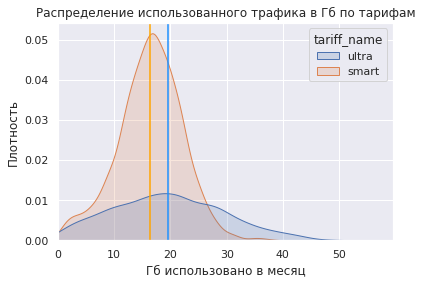

In [ ]:
kde_plot(data=final_data,
         x='gb_used_monthly',
         measure="Гб",
         what_consume="интернет",
         xlabel='Гб использовано в месяц',
         hue='tariff_name',
         title='Распределение использованного трафика в Гб по тарифам',
         shade=True,
         alpha=0.2)

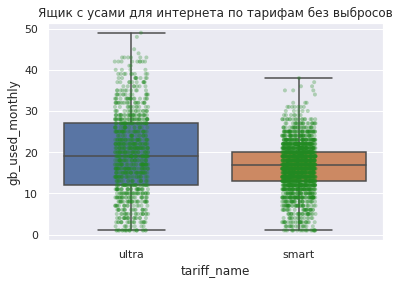

In [ ]:
boxplot_foo(data=final_data,
            x_column='tariff_name',
                     y_column='gb_used_monthly',
                     title='Ящик с усами для интернета по тарифам без выбросов',)

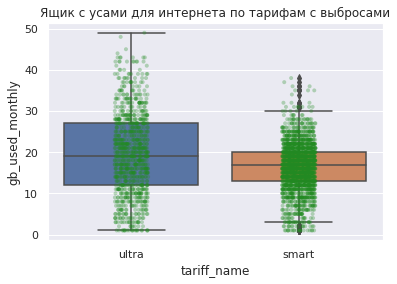

In [ ]:
boxplot_foo(data=final_data,
            x_column='tariff_name',
                     y_column='gb_used_monthly',
                     title='Ящик с усами для интернета по тарифам с выбросами',
           outliers=True)

------------------------------
Тест Шапиро-Уилка:
1.Нулевая гипотеза - распределение выборки не отличается от нормального
2.Альтернативная гипотеза - распределение выборки отличается от нормального
------------------------------
stat = 0.990, p-value = 0.000000
Вероятнее всего у столбца gb_used_monthly по тарифу smart ненормальное распределение
Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:


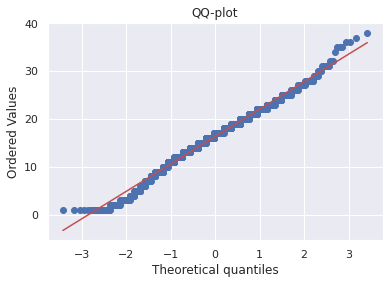

In [ ]:
shapiro_test_with_qq(data=final_data,
                     column='gb_used_monthly',
                     tariff='smart',
                     condition=final_data['tariff_name']=='smart')

------------------------------
Тест Шапиро-Уилка:
1.Нулевая гипотеза - распределение выборки не отличается от нормального
2.Альтернативная гипотеза - распределение выборки отличается от нормального
------------------------------
stat = 0.987, p-value = 0.000000
Вероятнее всего у столбца gb_used_monthly по тарифу ultra ненормальное распределение
Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:


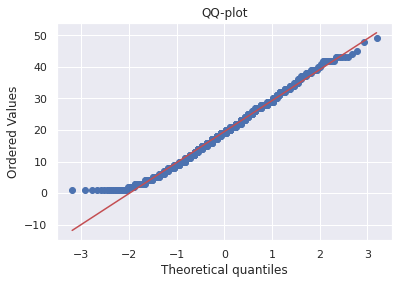

In [ ]:
shapiro_test_with_qq(data=final_data,
                     column='gb_used_monthly',
                     tariff='ultra',
                     condition=final_data['tariff_name']=='ultra')

**Вывод для интернета:**

Для тарифа **smart**:

* Распределние практически нормальное. Схоже с ним.
* Дисперсия равна - 34637846.1 ГБ
* Среднее значение - 17688.34 Гб
* Стандартное отклонение равна - 5885.4 ГБ

Для тарифа **ultra**:

* Распределние относительно нормальное. Схоже с ним.
* Дисперсия равна - 100092385.4 ГБ
* Среднее значение - 21087.84 Гб
* Стандартное отклонение равна - 10004.6 ГБ

**Общий вывод:**

* Клиенты тарифа "ultra" используют интернет на 3399.5 Гб больше в среднем





Среднее значение минут использовано в месяц по тарифу "smart" равняется 417.75 минут
Среднее значение минут использовано в месяц по тарифу "ultra" равняется 526.09 минут
Дисперсия в минут по звонки по тарифу "smart" равняется 36265.1
Дисперсия в минут по звонки по тарифу "ultra" равняется 100950.0
Стандартное отклонение в минут по звонки по тарифу "smart" равняется 190.4
Стандартное отклонение в минут по звонки по тарифу "ultra" равняется 317.7
Клиенты тарифа "ultra" используют звонки на 108.3 минут больше в среднем


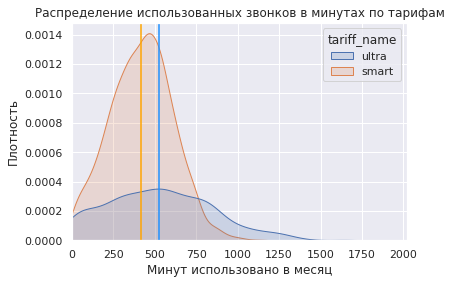

In [ ]:
kde_plot(data=final_data,
         x='call_dur_monthly',
         measure="минут",
         what_consume="звонки",
         xlabel='Минут использовано в месяц',
         hue='tariff_name',
         title='Распределение использованных звонков в минутах по тарифам',)

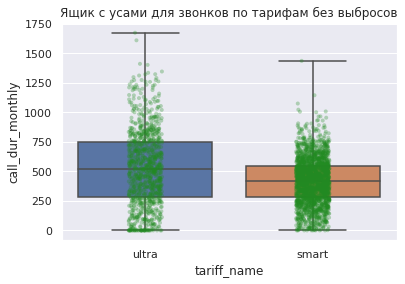

In [ ]:
boxplot_foo(data=final_data,
            x_column='tariff_name',
                     y_column='call_dur_monthly',
                     title='Ящик с усами для звонков по тарифам без выбросов')

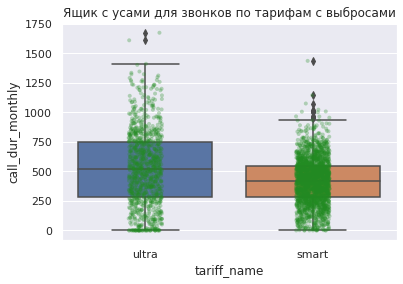

In [ ]:
boxplot_foo(data=final_data,
            x_column='tariff_name',
                     y_column='call_dur_monthly',
                     title='Ящик с усами для звонков по тарифам с выбросами',
           outliers=True)

------------------------------
Тест Шапиро-Уилка:
1.Нулевая гипотеза - распределение выборки не отличается от нормального
2.Альтернативная гипотеза - распределение выборки отличается от нормального
------------------------------
stat = 0.994, p-value = 0.000000
Вероятнее всего у столбца call_dur_monthly по тарифу smart ненормальное распределение
Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:


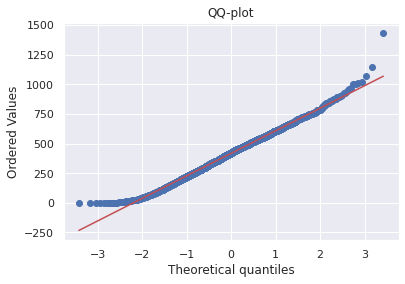

In [ ]:
shapiro_test_with_qq(data=final_data,
                     column='call_dur_monthly',
                     tariff='smart',
                     condition=final_data['tariff_name']=='smart')


------------------------------
Тест Шапиро-Уилка:
1.Нулевая гипотеза - распределение выборки не отличается от нормального
2.Альтернативная гипотеза - распределение выборки отличается от нормального
------------------------------
stat = 0.981, p-value = 0.000000
Вероятнее всего у столбца call_dur_monthly по тарифу ultra ненормальное распределение
Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:


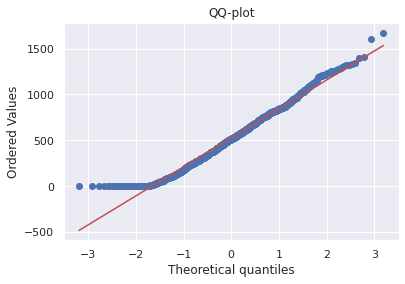

In [ ]:
shapiro_test_with_qq(data=final_data,
                     column='call_dur_monthly',
                     tariff='ultra',
                     condition=final_data['tariff_name']=='ultra')

**Вывод для звонков:**

Для тарифа **smart**:

* Распределние практически нормальное. Схоже с ним.
* Дисперсия равна - 36265.1 минут
* Среднее значение - 417.75 минут
* Стандартное отклонение равно - 190.4 минут

Для тарифа **ultra**:

* Распределние относительно нормальное. Схоже с ним.
* Дисперсия равна - 100092385.4 минут
* Среднее значение - 528.01 минут
* Стандартное отклонение равно - 318.0 минут

**Общий вывод:**

* Клиенты тарифа "ultra" используют звонки на 110.3 минут больше в среднем




Среднее значение сообщений отправлено в месяц по тарифу "smart" равняется 33.37 штук
Среднее значение сообщений отправлено в месяц по тарифу "ultra" равняется 49.31 штук
Дисперсия в штук по сообщения по тарифу "smart" равняется 796.6
Дисперсия в штук по сообщения по тарифу "ultra" равняется 2283.1
Стандартное отклонение в штук по сообщения по тарифу "smart" равняется 28.2
Стандартное отклонение в штук по сообщения по тарифу "ultra" равняется 47.8
Клиенты тарифа "ultra" используют сообщения на 15.9 штук больше в среднем


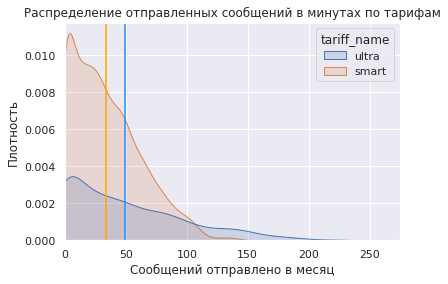

In [ ]:
kde_plot(data=final_data,
         x='message_monthly'
         ,measure="штук",
         what_consume="сообщения",
         xlabel='Сообщений отправлено в месяц',
         hue='tariff_name',
         title='Распределение отправленных сообщений в минутах по тарифам')

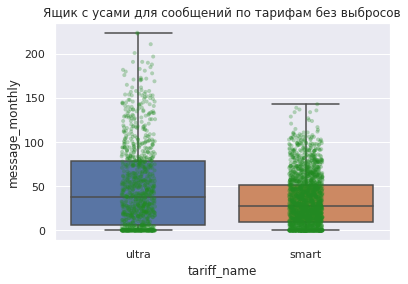

In [ ]:
boxplot_foo(data=final_data,
            x_column='tariff_name',
                     y_column='message_monthly',
                     title='Ящик с усами для сообщений по тарифам без выбросов')

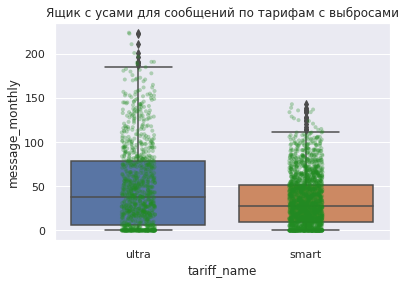

In [ ]:
boxplot_foo(data=final_data,
            x_column='tariff_name',
                     y_column='message_monthly',
                     title='Ящик с усами для сообщений по тарифам с выбросами',
           outliers=True)

------------------------------
Тест Шапиро-Уилка:
1.Нулевая гипотеза - распределение выборки не отличается от нормального
2.Альтернативная гипотеза - распределение выборки отличается от нормального
------------------------------
stat = 0.926, p-value = 0.000000
Вероятнее всего у столбца message_monthly по тарифу smart ненормальное распределение
Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:


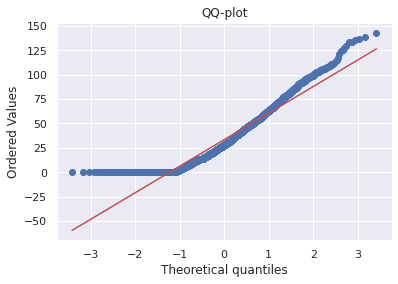

In [ ]:
shapiro_test_with_qq(data=final_data,
                     column='message_monthly',
                     tariff='smart',
                     condition=final_data['tariff_name']=='smart')

------------------------------
Тест Шапиро-Уилка:
1.Нулевая гипотеза - распределение выборки не отличается от нормального
2.Альтернативная гипотеза - распределение выборки отличается от нормального
------------------------------
stat = 0.890, p-value = 0.000000
Вероятнее всего у столбца message_monthly по тарифу ultra ненормальное распределение
Можем подтвердить вывод, проанализровав отклонение от теоретической прямой на графике QQ-plot:


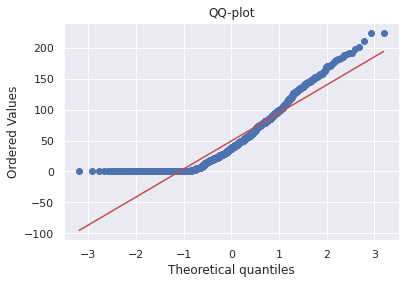

In [ ]:
shapiro_test_with_qq(data=final_data,
                     column='message_monthly',
                     tariff='ultra',
                     condition=final_data['tariff_name']=='ultra')

**Вывод для сообщений:**

Для тарифа **smart**:

* Распределние Пуасонна. Схоже с ним.
* Дисперсия равна - 796.6 штук
* Среднее значение - 33.37 штук
* Стандартное отклонение равно - 28.2 штук

Для тарифа **ultra**:

* Распределние Пуасонна. Схоже с ним.
* Дисперсия равна - 2298.0 штук
* Среднее значение - 49.41 штук
* Стандартное отклонение равно - 47.9 штук

**Общий вывод:**

* Клиенты тарифа "ultra" используют сообщения на 16.0 штук больше в среднем




## Тестирование гипотез.

In [ ]:
#  выручка по тарифу smart
smart_tariff_revenue = final_data[final_data['tariff_name'] == 'smart']['full_revenue']

In [ ]:
smart_tariff_revenue.name = 'smart_tariff_revenue'

In [ ]:
# выручка по тарифу ultra
ultra_tariff_revenue = final_data[final_data['tariff_name'] == 'ultra']['full_revenue']

In [ ]:
ultra_tariff_revenue.name = 'ultra_tariff_revenue'

In [ ]:
# функция для тестирование гипотез равных средних
# с Т-тестом и Тестом Левене и статистиками
def ind_ttest(data_1,
              data_2,
              data_1_name,
              data_2_name,
              title,
              xlabel,
              ylabel,
              measure="рублей",
              shade_1=True,
              alpha_1=0.3,
              shade_2=True,
              alpha_2=0.3,
             mode_=True,
             mean_=True,
             std_=True,
             standartised_mean_by_mode=True,
             city=True,
              test_alpha=0.05
             ):
    sns.set(style='darkgrid')
    sns.kdeplot(data_1,
                shade=shade_1,
                alpha=alpha_1)
    sns.kdeplot(data_2,
                shade=shade_2,
                alpha=alpha_2)
    print(f'Размер первой выборки {len(data_1)}')
    print(f'Размер второй выборки {len(data_2)}')
    print('-'*30)
    if mode_:
        if city:
            if 'moscow' in data_1_name:
                print(f'Мода выручки в городе Москва равняется {st.mode(data_1).mode} {measure}')
                print(f'Мода выручки в других городах равняется {st.mode(data_2).mode} {measure}')
            else:
                print(f'Мода выручки в других городах равняется равняется {st.mode(data_1).mode} {measure}')
                print(f'Мода выручки в городе Москва равняется равняется {st.mode(data_2).mode} {measure}')
        else:
            if 'smart' in data_1_name:
                print(f'Мода выручки для тарифа "smart" равняется {st.mode(data_1).mode} {measure}')
                print(f'Мода выручки для тарифа "ultra" равняется {st.mode(data_2).mode} {measure}')
            else:
                print(f'Мода выручки для тарифа "ultra" равняется {st.mode(data_1).mode} {measure}')
                print(f'Мода выручки для тарифа "smart" равняется {st.mode(data_2).mode} {measure}')
    else:
        print('Можем посчитать моду, если укажите значение переменной "mode_" True')
    if mean_:
        if city:
            if 'moscow' in data_1_name:
                print(f'Среднее значение выручки в городе Москва равняется {np.mean(data_1)} {measure}')
                print(f'Среднее значение выручки в других городах равняется {np.mean(data_2)} {measure}')
            else:
                print(f'Среднее значение выручки в других городах равняется {np.mean(data_1)} {measure}')
                print(f'Среднее значение выручки в городе Москва равняется {np.mean(data_2)} {measure}')
        else:
            if 'smart' in data_1_name:
                print(f'Среднее значение выручки для тарифа "smart" равняется {np.mean(data_1)} {measure}')
                print(f'Среднее значение выручки для тарифа "ultra" равняется {np.mean(data_2)} {measure}')
            else:
                print(f'Среднее значение выручки для тарифа "ultra" равняется {np.mean(data_1)} {measure}')
                print(f'Среднее значение выручки для тарифа "smart" равняется {np.mean(data_2)} {measure}')
    else:
        print('Можем посчитать среднее значение, если укажите значение переменной "mean_" True')
    if std_:
        if city:
            if 'moscow' in data_1_name:
                print(f'Стандартное отклонение выручки в городе Москва равняется {np.std(data_1)} {measure}')
                print(f'Стандартное отклонение выручки в других городах равняется {np.std(data_2)} {measure}')
            else:
                print(f'Стандартное отклонение выручки в других городах равняется {np.std(data_1)} {measure}')
                print(f'Стандартное отклонение выручки в городе Москва равняется {np.std(data_2)} {measure}')
        else:
            if 'smart' in data_1_name:
                print(f'Стандартное отклонение выручки для тарифа "smart" равняется {np.std(data_1)} {measure}')
                print(f'Стандартное отклонение выручки для тарифа "ultra" равняется {np.std(data_2)} {measure}')
            else:
                print(f'Стандартное отклонение выручки для тарифа "ultra" равняется {np.std(data_1)} {measure}')
                print(f'Стандартное отклонение выручки для тарифа "smart" равняется {np.std(data_2)} {measure}')
    else:
        print('Можем посчитать стандартное отклонение, если укажите значение переменной "std_" True')
    if standartised_mean_by_mode:
        data_1_standart = np.mean(data_1)/ st.mode(data_1).mode
        data_2_standart = np.mean(data_2)/st.mode(data_2).mode
        if city == True:
            if 'moscow' in data_1_name:
                if data_1_standart < data_2_standart:
                    bigger_hm = data_2_standart / data_1_standart
                    print(f'В остальных городах средняя выручка, стандартизированная по моде выручки, больше, чем в Москве в {bigger_hm} раз')
                elif data_1_standart > data_2_standart:
                    bigger_hm = data_1_standart / data_2_standart
                    print(f'В Москве средняя выручка, стандартизированная по моде выручки, больше, чем в остальных городах в {bigger_hm} раз')
                else:
                    print(f'Разницы между средних значений по выручки относительно моды выручки между Москвой и остальными городами нет')
            else:
                if data_1_standart < data_2_standart:
                    bigger_hm = data_2_standart / data_1_standart
                    print(f'В Москве средняя выручка, стандартизированная по моде выручки, больше, чем в остальных городах в {bigger_hm} раз')
                elif data_1_standart > data_2_standart:
                    bigger_hm = data_1_standart / data_2_standart
                    print(f'В остальных городах средняя выручка, стандартизированная по моде выручки, больше, чем в Москве в {bigger_hm} раз')
                else:
                    print(f'Разницы между средних  значений по выручки относительно моды выручки между Москвой и остальными городами нет')
        else:
            if 'smart' in data_1_name:
                if data_1_standart < data_2_standart:
                    bigger_hm = data_2_standart / data_1_standart
                    print(f'Средняя выручка, стандартизированная по моде выручки, по тарифу "ultra" больше, чем по тарифу "smart" в {bigger_hm} раз')
                elif data_1_standart > data_2_standart:
                    bigger_hm = data_1_standart / data_2_standart
                    print(f'Средняя выручка, стандартизированная по моде выручки, по тарифу "smart" больше, чем по тарифу "ultra" в {bigger_hm} раз')
                else:
                    print(f'Разницы между средних значений по выручки относительно моды выручки между тарифами "smart" и "ultra" нет')
            else:
                if data_1_standart < data_2_standart:
                    bigger_hm = data_2_standart / data_1_standart
                    print(f'Средняя выручка, стандартизированная по моде выручки, по тарифу "smart" больше, чем по тарифу "ultra" в {bigger_hm} раз')
                elif data_1_standart > data_2_standart:
                    bigger_hm = data_1_standart / data_2_standart
                    print(f'Средняя выручка, стандартизированная по моде выручки, по тарифу "ultra" больше, чем по тарифу "smart" в {bigger_hm} раз')
                else:
                    print(f'Разницы между средних значений по выручки относительно моды выручки между тарифами "smart" и "ultra" нет')
    plt.legend(labels=[data_1.name,data_2.name],loc='upper right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    stats_levene,pvalue_levene = st.levene(data_1,data_2)
    print('-'*30)
    print('Тест Левене:\n1.Нулевая гипотеза - дисперсии выборок равны\n2.Альтернативная гипотеза - дисперсии выборок не равны')
    print('-'*30)
    print('Тест Уэлча или Тест Студента:\n1.Нулевая гипотеза - средние значение у выборок равны\n2.Альтернативная гипотеза - среднии значения выборок не равны')
    print('-'*30)
    if pvalue_levene < test_alpha:
        print(f"На тесте Левене отклоняем нулевую гипотезу о равенстве дисперсий выборок\nпоскольку p-value меньше критического уровня значимости, а именно имеет значение {pvalue_levene:.10f}\nи приходим к выводу, что нужно использовать критерий 'equal_var' равным False")
        print('-'*30)
        print('Нулевая гипотеза: средние двух выборок E1 и E2 соответственно равны\nАльтернативная гипотеза: средние двух выборок E1 и E2 НЕ равны')
        stats_ttest, pvalue_ttest = st.ttest_ind(data_1,data_2,equal_var=False)
        print('-'*30)
        print(f'Критический уровень значимости для Т-теста также как и для Левена равняется {test_alpha}.\nЭтот выбор пал потому, что это бизнес-исследование и нам нужно зацепиться за малейший шанс или возможность. \nЕсли бы это была задача научно-исследовательского характера, то можно было взять 0.01 и меньше,\nчтобы быть на 99% увереными в своей работа.')
        if  pvalue_ttest < test_alpha:
            print('-'*30)
            print(f'Значение p-value меньше критического уровня значимости {pvalue_ttest} < {test_alpha}.\nСледовательно=>мы имеем полно право отвергнуть нулевую гипотезу в пользу альтернативной. \nЭто означает, что средние двух выборок не равны:\nE1 != E2')
        else:
            print('-'*30)
            print(f'Значение p-value больше критического уровня значимости {pvalue_ttest} > {test_alpha}.\nСледовательно=>мы имеем полно право не отвергать нулевую гипотезу в пользу альтернативной. \nЭто означает, что средние двух выборок равны:\nE1 = E2')
    else:
        print(f"На тесте Левене отклоняем нулевую гипотезу о равенстве дисперсий выборок\nпоскольку p-value больше критического уровня значимости, а именно имеет значение {pvalue_levene:.10f}\nи приходим к выводу, что нужно использовать критерий 'equal_var' равным True")
        print('-'*30)
        print('Нулевая гипотеза: средние двух выборок E1 и E2 соответственно равны\nАльтернативная гипотеза: средние двух выборок E1 и E2 НЕ равны')
        stats_ttest, pvalue_ttest = st.ttest_ind(data_1,data_2,equal_var=True)
        print('-'*30)
        print(f'Критический уровень значимости для Т-теста также как и для Левена равняется {test_alpha}.\nЭтот выбор пал потому, что это бизнес-исследование и нам нужно зацепиться за малейший шанс или возможность. \nЕсли бы это была задача научно-исследовательского характера, то можно было взять 0.01 и меньше,\nчтобы быть на 99% увереными в своей работа.')
        if  pvalue_ttest < test_alpha:
            print('-'*30)
            print(f'Значение p-value меньше критического уровня значимости {pvalue_ttest} < {test_alpha}.\nСледовательно=>мы имеем полно право отвергнуть нулевую гипотезу в пользу альтернативной. \nЭто означает, что средние двух выборок не равны:\nE1 != E2')
        else:
            print('-'*30)
            print(f'Значение p-value больше критического уровня значимости {pvalue_ttest} >{test_alpha}.\nСледовательно=>мы имеем полно право не отвергать нулевую гипотезу в пользу альтернативной. \nЭто означает, что средние двух выборок равны:\nE1 = E2')


Размер первой выборки 2230
Размер второй выборки 986
------------------------------
Мода выручки для тарифа "smart" равняется [550] рублей
Мода выручки для тарифа "ultra" равняется [1950] рублей
Среднее значение выручки для тарифа "smart" равняется 1289.6417040358745 рублей
Среднее значение выручки для тарифа "ultra" равняется 2070.030425963489 рублей
Стандартное отклонение выручки для тарифа "smart" равняется 818.187286749185 рублей
Стандартное отклонение выручки для тарифа "ultra" равняется 375.8248522398115 рублей
Средняя выручка, стандартизированная по моде выручки, по тарифу "smart" больше, чем по тарифу "ultra" в [2.20884002] раз
------------------------------
Тест Левене:
1.Нулевая гипотеза - дисперсии выборок равны
2.Альтернативная гипотеза - дисперсии выборок не равны
------------------------------
Тест Уэлча или Тест Студента:
1.Нулевая гипотеза - средние значение у выборок равны
2.Альтернативная гипотеза - среднии значения выборок не равны
------------------------------
На т

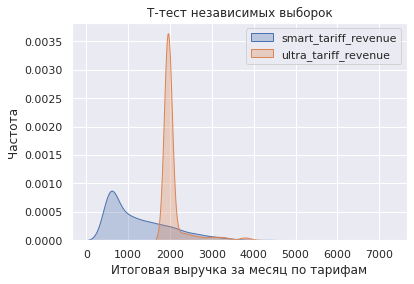

In [ ]:
ind_ttest(data_1 = smart_tariff_revenue,
          data_2 = ultra_tariff_revenue,
          data_1_name = smart_tariff_revenue.name,
          data_2_name = ultra_tariff_revenue.name,
          title='Т-тест независимых выборок',
         xlabel='Итоговая выручка за месяц по тарифам',
         ylabel='Частота',
         city=False
         )

In [ ]:
# находим выручку для Москвы
moscow_full_revenue = final_data[final_data['city']=="москва"]['full_revenue']
moscow_full_revenue.name = 'Moscow_full_revenue'

In [ ]:
# Выручку для остальных городов
other_cities_full_revenue = final_data[final_data['city']!="москва"]['full_revenue']
other_cities_full_revenue.name = 'other_cities_full_revenue'

Исходя из теста Шапиро-Уилка и соответствующей нулевой гипотез о нормальности распределения считаю некорректным использовать ни Т-критерий Студента, ни Т-критерий Уэлча, поскольку распределение значимо отклоняется от нормального и на глаз, и на тест:

1. С тарифами: есть много выбросов, хоть распределнье и уномодально и близко по картинке к нормальному. Конечно, можно его использовать, но мне думается, что это не очень правильно.

2. С городами: естьи  выбросы и очень страшное нарушение, по моему мненью - практически биомодальность.

Также, в обоих случаях сильно отличается размер выборки.


Используем тест Уэлча, поскольку по тесту Левене дисперсии выборок значимо отклоняются от нулевой гипотезе о равнестве дисперсий.

По учебнику мы должны были применить тест Мана-Уитни(и чем больше выборка, тем вероятнее его использование), который менее чувствительный к выбросам. В этом случае я проверил и результаты одни и те же, предполагаю, что в бизнесе можно всегда использовать критерий Студента или Уэлча и все.



Размер первой выборки 611
Размер второй выборки 2605
------------------------------
Мода выручки в других городах равняется равняется [1950] рублей
Мода выручки в городе Москва равняется равняется [1950] рублей
Среднее значение выручки в других городах равняется 1546.7135842880523 рублей
Среднее значение выручки в городе Москва равняется 1524.7251439539348 рублей
Стандартное отклонение выручки в других городах равняется 751.4723625967407 рублей
Стандартное отклонение выручки в городе Москва равняется 808.5904356300226 рублей
В остальных городах средняя выручка, стандартизированная по моде выручки, больше, чем в Москве в [1.01442125] раз
------------------------------
Тест Левене:
1.Нулевая гипотеза - дисперсии выборок равны
2.Альтернативная гипотеза - дисперсии выборок не равны
------------------------------
Тест Уэлча или Тест Студента:
1.Нулевая гипотеза - средние значение у выборок равны
2.Альтернативная гипотеза - среднии значения выборок не равны
------------------------------
На 

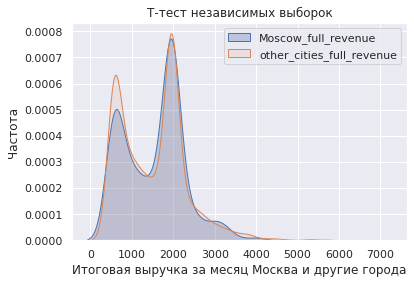

In [ ]:
# проводим тест
ind_ttest(data_1 = moscow_full_revenue,
          data_2 = other_cities_full_revenue,
          data_1_name = moscow_full_revenue.name,
          data_2_name = other_cities_full_revenue.name,
          title='Т-тест независимых выборок',
         xlabel='Итоговая выручка за месяц Москва и другие города',
         ylabel='Частота',
         city=True,
         alpha_2=0.1
         )

## Отток клиентов.

In [ ]:
final_data.head(2)

,user_id,reg_month,gb_used_monthly,call_dur_monthly,message_monthly,registration_month,churn_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_revenue,call_revenue,message_revenue,full_revenue
0,1000,5,3,159,22,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1,0,0,0,1950
1,1000,6,23,172,60,5,NaN,краснодар,ultra,1000,30,3000,1950,150,1,1,0,0,0,1950


In [ ]:
final_data['contract_duration'] = final_data['churn_month'] - final_data['reg_month']

In [ ]:
# сколько всего от общего количество данных ушедших по тарифу 'smart'
churn_percent_smart = round(len(final_data[((final_data['tariff_name'] == 'smart') & (final_data['contract_duration'].isna()==False))]) /
    len(final_data[final_data['tariff_name'] == 'smart']['contract_duration']),2)

In [ ]:
# сколько всего от общего количество данных ушедших по тарифу 'ultra'
churn_percent_ultra = round(len(final_data[((final_data['tariff_name'] == 'ultra') & (final_data['contract_duration'].isna()==False))]) /
    len(final_data[final_data['tariff_name'] == 'ultra']['contract_duration']),2)

In [ ]:
print(f'Процент ушедших клиентов клиентов по тарифу от общего числа клиентов:\n"smart" = {churn_percent_smart}%\n"ultra" = {churn_percent_ultra}%')

Процент ушедших клиентов клиентов по тарифу от общего числа клиентов:
"smart" = 0.05%
"ultra" = 0.08%


In [ ]:
# подготовка: сколько всего записей с оттоком для ultra
smart_contract_duration = final_data[final_data['tariff_name'] == 'smart']['contract_duration']

In [ ]:
# подготовка: сколько всего записей с оттоком для ultra
ultra_contract_duration = final_data[final_data['tariff_name'] == 'ultra']['contract_duration']

In [ ]:
#  для удобства создаем таблицу
client_outflow = final_data.groupby('tariff_name')['contract_duration'].agg(['count','size'])

In [ ]:
client_outflow['outflow_rate'] = client_outflow['size'] / client_outflow['count'] / 100

In [ ]:
client_outflow

,count,size,outflow_rate
tariff_name,,,
smart,112,2230,0.199107
ultra,77,986,0.128052


Среднее значение месяц по тарифу "smart" равняется 2.72 месяца
Среднее значение месяц по тарифу "ultra" равняется 2.6 месяца
Дисперсия в месяца по оттоку по месяцам по тарифу "smart" равняется 5.8
Дисперсия в месяца по оттоку по месяцам по тарифу "ultra" равняется 4.6
Стандартное отклонение в месяца по оттоку по месяцам по тарифу "smart" равняется 2.4
Стандартное отклонение в месяца по оттоку по месяцам по тарифу "ultra" равняется 2.1
Клиенты тарифа "smart" используют оттоку по месяцам на 0.1 месяца больше в среднем


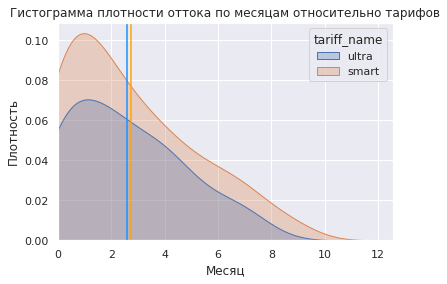

In [ ]:
# анализ оттока
kde_plot(data=final_data,
            x='contract_duration',
            hue='tariff_name',
            shade=True,
            measure='месяца',
            what_consume='оттоку по месяцам',
            title='Гистограмма плотности оттока по месяцам относительно тарифов',
            xlabel='Месяц',
            alpha=0.3)


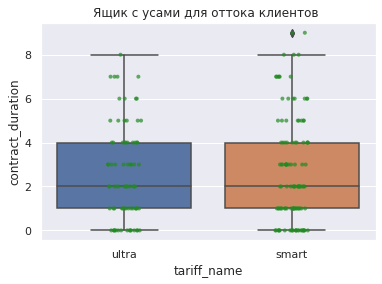

In [ ]:
boxplot_foo(final_data,x_column='tariff_name',y_column='contract_duration',title='Ящик с усами для оттока клиентов ',outliers=True,dot_alpha=0.7)

## Выручка на одного пользователя по тарифам

In [ ]:
sum_of_revenue_smart = smart_tariff_revenue.sum()
unique_id_smart = final_data[final_data['tariff_name'] == 'smart']['user_id'].nunique()

In [ ]:
sum_of_revenue_smart


2875901

In [ ]:
unique_id_smart

351

In [ ]:
sum_of_revenue_ultra = ultra_tariff_revenue.sum()
unique_id_ultra = final_data[final_data['tariff_name'] == 'ultra']['user_id'].nunique()

In [ ]:
unique_id_ultra

149

In [ ]:
sum_of_revenue_ultra

2041050

In [ ]:
print(f'Разница между суммами выручки по тарифу {sum_of_revenue_smart - sum_of_revenue_ultra} рублей.\nСуммарная выручка по тарифу "smart" больше, чем "ultra" на {sum_of_revenue_smart - sum_of_revenue_ultra} рублей.')

Разница между суммами выручки по тарифу 834851 рублей.
Суммарная выручка по тарифу "smart" больше, чем "ultra" на 834851 рублей.


In [ ]:
revenue_by_person_ultra = sum_of_revenue_ultra / unique_id_ultra

In [ ]:
revenue_by_person_ultra

13698.322147651006

In [ ]:
revenue_by_person_smart= sum_of_revenue_smart/unique_id_smart

In [ ]:
revenue_by_person_smart

8193.450142450143

In [ ]:
# выручка на одного пользователя по тарифу ultra
print(f'Выручка на одного пользователя по тарифу "ultra" {revenue_by_person_ultra}')
# выручка на одного пользователя по тарифу smart
print(f'Выручка на одного пользователя по тарифу "smart" {revenue_by_person_smart}')

print(f'Разница между выручкой на одного пользователя между "ultra" и "smart" равняется {revenue_by_person_ultra-revenue_by_person_smart} рублей.\nВыручка на одного пользователя тарифа "ultra" выше, чем "smart" на {revenue_by_person_ultra-revenue_by_person_smart} рублей.')

Выручка на одного пользователя по тарифу "ultra" 13698.322147651006
Выручка на одного пользователя по тарифу "smart" 8193.450142450143
Разница между выручкой на одного пользователя между "ultra" и "smart" равняется 5504.872005200863 рублей.
Выручка на одного пользователя тарифа "ultra" выше, чем "smart" на 5504.872005200863 рублей.


## Общий Вывод:


### Интернет по тарифам.

**Вывод для интернета:**

Для тарифа **smart**:

* Распределние практически нормальное. Схоже с ним.
* Дисперсия равна - 34637846.1 ГБ
* Среднее значение - 17688.34 Гб
* Стандартное отклонение равна - 5885.4 ГБ

Для тарифа **ultra**:

* Распределние относительно нормальное. Схоже с ним.
* Дисперсия равна - 100092385.4 ГБ
* Среднее значение - 21087.84 Гб
* Стандартное отклонение равна - 10004.6 ГБ

**Общий вывод:**

* Клиенты тарифа "ultra" используют интернет на 3399.5 Гб больше в среднем



### Звонки по тарифам.

**Вывод для звонков:**

Для тарифа **smart**:

* Распределние практически нормальное. Схоже с ним.
* Дисперсия равна - 36265.1 минут
* Среднее значение - 417.75 минут
* Стандартное отклонение равно - 190.4 минут

Для тарифа **ultra**:

* Распределние относительно нормальное. Схоже с ним.
* Дисперсия равна - 100092385.4 минут
* Среднее значение - 528.01 минут
* Стандартное отклонение равно - 318.0 минут

**Общий вывод:**

* Клиенты тарифа `ultra` используют звонки на 110.3 минут больше в среднем




### Сообщения по тарифам.

**Вывод для сообщений:**

Для тарифа **smart**:

* Распределние Пуасонна. Схоже с ним.
* Дисперсия равна - 796.6 штук
* Среднее значение - 33.37 штук
* Стандартное отклонение равно - 28.2 штук

Для тарифа **ultra**:

* Распределние Пуасонна. Схоже с ним.
* Дисперсия равна - 2298.0 штук
* Среднее значение - 49.41 штук
* Стандартное отклонение равно - 47.9 штук

**Общий вывод:**

* Клиенты тарифа `ultra` используют сообщения на 16.0 штук больше в среднем





### Средняя выручка по тарифам.

* Размер первой выборки 2230
* Размер второй выборки 979
* Мода выручки для тарифа `smart` равняется 550 рублей
* Мода выручки для тарифа `ultra` равняется 1950 рублей
* Среднее значение выручки для тарифа `smart` равняется 1345.6058295964126 рублей
* Среднее значение выручки для тарифа `ultra` равняется 2090.194075587334 рублей
* Стандартное отклонение выручки для тарифа `smart` равняется 854.7881967023334 рублей
* Стандартное отклонение выручки для тарифа `ultra` равняется 414.44902091243785 рублей
* Средняя выручка, стандартизированная по моде выручки, по тарифу `smart` больше, чем по тарифу `ultra` в 2.28245997 раз
* На тесте Левене отклоняем нулевую гипотезу о равенстве дисперсий выборок
****
* Значение p-value меньше критического уровня значимости 1.3209118570893012e-207 < 0.05. Следовательно=>мы имеем полно право отвергнуть нулевую гипотезу в пользу альтернативной.
* Это означает, что средние двух выборок не равны:
E1 != E2
#### Выручка на одного пользователя по тарифам:

* Выручка на одного пользователя по тарифу `ultra` 13657.1 рублей.

* Выручка на одного пользователя по тарифу `smart` 7781.5 рублей.

* Разница между суммами выручки по тарифу 696401 рублей.

* Суммарная выручка по тарифу `smart` больше, чем `ultra` на 696401 рублей.

#### Какой тариф лучше и стоит больше выделять денег?

Исходя из анализа можем сказать, что тариф `ultra` лучше, чем `smart`, потому что:


1. Отток клиентов чаще происходит у `smart`
2. Выручка на одного клиента выше на почти 6_000 рублей.

Маркетогам

* Выручка на одного пользователя по тарифу `ultra` 13657.046979865772
* Выручка на одного пользователя по тарифу `smart` 7781.484330484331
* Разница между выручкой на одного пользователя между `ultra` и `smart` равняется 5875.562649381442 рублей.
* Выручка на одного пользователя тарифа `ultra` выше, чем `smart` на 5875.562649381442 рублей.

### Средняя выручка по Москве и другим городам.
* Размер первой выборки 611
* Размер второй выборки 2598
* Мода выручки в других городах равняется равняется 1950 рублей
* Мода выручки в городе Москва равняется равняется 1950 рублей
* Среднее значение выручки в других городах равняется 1589.430441898527 рублей
* Среднее значение выручки в городе Москва равняется 1568.8448806774443 рублей
* Стандартное отклонение выручки в других городах равняется 773.6007227389515 рублей
* Стандартное отклонение выручки в городе Москва равняется 834.4148951675672 рублей
* В остальных городах средняя выручка, стандартизированная по моде выручки, больше, чем в Москве в 1.01312148 раз
* На тесте Левене отклоняем нулевую гипотезу о равенстве дисперсий выборок
поскольку p-value меньше критического уровня значимости, а именно имеет значение 0.0134257727
****
* Значение p-value больше критического уровня значимости 0.5604056960800323 > 0.05.
Следовательно=>мы имеем полно право не отвергать нулевую гипотезу в пользу альтернативной.
* Это означает, что средние двух выборок равны:
E1 = E2
### Отток клиентов.

* Среднее значение месяц по тарифу `smart` равняется 2.72 месяца
* Среднее значение месяц по тарифу `ultra` равняется 2.6 месяца
* Дисперсия в месяца по оттоку по месяцам по тарифу `smart` равняется 5.8
* Дисперсия в месяца по оттоку по месяцам по тарифу `ultra` равняется 4.6
* Стандартное отклонение в месяца по оттоку по месяцам по тарифу `smart` равняется 2.4
* Стандартное отклонение в месяца по оттоку по месяцам по тарифу `ultra` равняется 2.1
* Клиенты тарифа `smart` используют свой тариф по месяцам на 0.1 месяца больше в среднем, чем `ultra`

Несмотря на среднее значение выше, чем на "ultra":

* С тарифа `smart` процент оттока равен ~0.20%
* С тарифа `ultra` процент оттока равен ~0.13%


Процент ушедших клиентов клиентов по тарифу от общего числа клиентов:
* `smart` = 0.05%
* `ultra` = 0.08%

## Вариант для рекомендаций бизнесу


In [ ]:
revenue = final_data.copy()

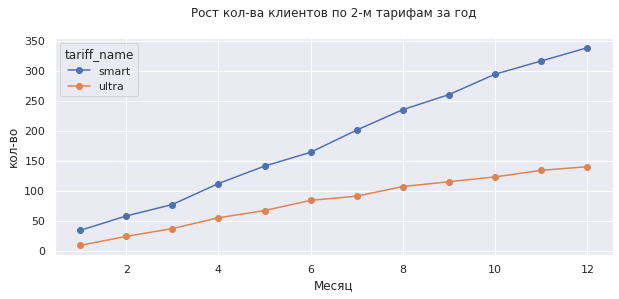

In [ ]:
(revenue
 .pivot_table(index='tariff_name', columns='reg_month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

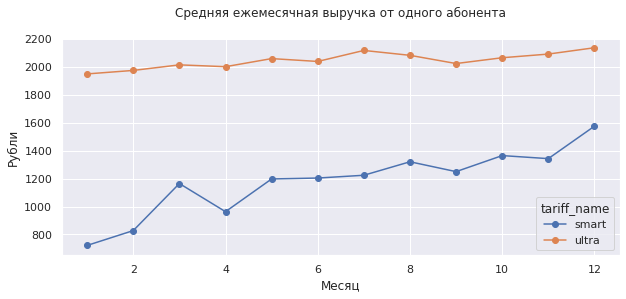

In [ ]:
(revenue
 .pivot_table(index='tariff_name', columns='reg_month', values='full_revenue', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

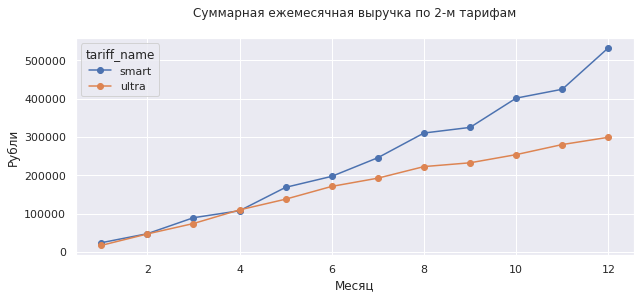

In [ ]:
(revenue
 .pivot_table(index='tariff_name', columns='reg_month', values='full_revenue', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

выручка от смартов уже в два раза выше выручки от ультры, но есть опасность - убегут клиенты смарт от такой счастливой жизни к конкурентам :)

In [ ]:

try:
    df_users = pd.read_csv('/datasets/users.csv')
except:
    df_users = pd.read_csv('users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


отток усиливается?

мы не ограничены в рекомендациях бизнесу только двумя тарифами, если мы видим риски для бизнеса мы можем предложить и третий и четвертый вариант развития тарифной политики